# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [120]:
# Create dataframe from generated cities list
cities_df = pd.DataFrame({"City": cities})

# Add additional columns to cities_df
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

# Set base url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

# Set counts for data retrival loop
city_count = -1
city_set = 1

# Print for start of loop
print("Beginning Data Retrieval")   
print("-----------------------------")

# Loop through cities in dataframe
for index, row in cities_df.iterrows():
    target_city = row["City"]
    query = f"{base_url}{target_city}&units=imperial&appid={api_key}"
    response = requests.get(query).json()
    
    # If city is found then add responses to dataframe
    try:
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        city_count += 1
        print(f"Processing Record {city_count} of Set {city_set} | {target_city}")
        if city_count == 49:
            city_set += 1
            city_count = 0 
            
    # If city is not found then skip the row
    except (KeyError):
        print("City not found. Skipping...")

# Print for end of loop
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 0 of Set 1 | jamestown
City not found. Skipping...
Processing Record 1 of Set 1 | menongue
City not found. Skipping...
Processing Record 2 of Set 1 | avarua
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | nelson bay
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | amuntai
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | san luis
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | kamenka
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | cortez
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | novouzensk
Processing Record 19 of Se

Processing Record 39 of Set 4 | roald
Processing Record 40 of Set 4 | kabanjahe
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | abeche
Processing Record 47 of Set 4 | gander
Processing Record 48 of Set 4 | kapuskasing
City not found. Skipping...
Processing Record 49 of Set 4 | margate
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | amahai
Processing Record 4 of Set 5 | homer
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | yulara
Processing Record 7 of Set 5 | charters towers
City not found. Skipping...
Processing Record 8 of Set 5 | namatanai
Processing Record 9 of Set 5 | hovd
Processing Record 10 of Set 5 | mporokoso
Processing Record 11 of Set 5 | victoria
Processing Record 12 of Set 5 | s

Processing Record 25 of Set 8 | katherine
Processing Record 26 of Set 8 | vallenar
Processing Record 27 of Set 8 | povenets
Processing Record 28 of Set 8 | alice springs
City not found. Skipping...
Processing Record 29 of Set 8 | rocha
Processing Record 30 of Set 8 | clyde river
Processing Record 31 of Set 8 | chicomuselo
Processing Record 32 of Set 8 | nishihara
Processing Record 33 of Set 8 | fort-shevchenko
Processing Record 34 of Set 8 | koslan
Processing Record 35 of Set 8 | acapulco
Processing Record 36 of Set 8 | wilkinsburg
Processing Record 37 of Set 8 | vao
Processing Record 38 of Set 8 | maldonado
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | rundu
Processing Record 41 of Set 8 | portland
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 8 | garango
Processing Record 43 of Set 8 | keffi
Processing Record 44 of Set 8 | olinda
Processing Record 45 of Set 8 | saint-philippe
Processing Record 46 of Set 8 | arrifes
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [166]:
cities_df = cities_df [cities_df.Cloudiness != '']
cities_df = cities_df.reset_index()
del cities_df["index"]
cities_df.to_csv(output_data_file)
cities_df.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [167]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,0,AU,1562624729,87,-33.21,138.6,43.18,4.03
1,menongue,51,AO,1562624909,20,-14.66,17.68,50.29,3.58
2,avarua,1,CK,1562624909,74,-21.21,-159.78,78.80,9.17
3,lagoa,0,PT,1562624910,72,37.14,-8.45,68.00,13.87
4,puerto ayora,20,EC,1562624636,58,-0.74,-90.35,82.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

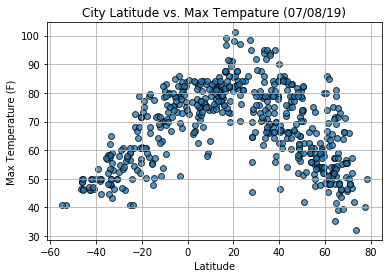

In [172]:
# Change column values to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])

# Create scatterplot
fig = cities_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, edgecolors="black", s=35, 
               alpha=.75, title="City Latitude vs. Max Tempature (07/08/19)")

# Add axis labels
fig.set_xlabel("Latitude")
fig.set_ylabel("Max Temperature (F)")

# Save Figure
plt.savefig('City Latitude vs. Max Tempature.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

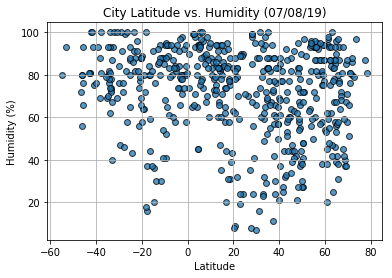

In [173]:
# Change column values to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])

# Create scatterplot
fig = cities_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, edgecolors="black", s=35, 
               alpha=.75, title="City Latitude vs. Humidity (07/08/19)")

# Add axis labels
fig.set_xlabel("Latitude")
fig.set_ylabel("Humidity (%)")

# Save Figure
plt.savefig('City Latitude vs. Humidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

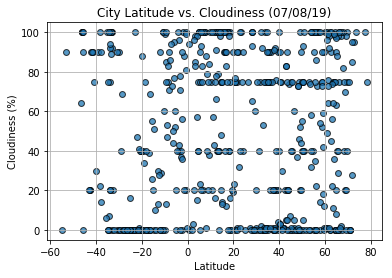

In [174]:
# Change column values to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])

# Create scatterplot
fig = cities_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, edgecolors="black", s=35, 
               alpha=.75, title="City Latitude vs. Cloudiness (07/08/19)")

# Add axis labels
fig.set_xlabel("Latitude")
fig.set_ylabel("Cloudiness (%)")

# Save Figure
plt.savefig('City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

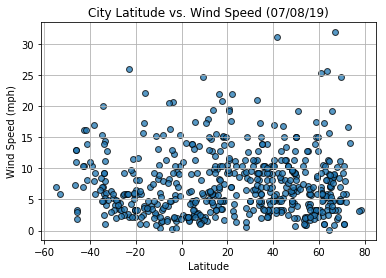

In [175]:
# Change column values to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

# Create scatterplot
fig = cities_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, edgecolors="black", s=35, 
               alpha=.75, title="City Latitude vs. Wind Speed (07/08/19)")

# Add axis labels
fig.set_xlabel("Latitude")
fig.set_ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig('City Latitude vs. Wind Speed.png')

# Show plot
plt.show()